In [1]:
import pandas as pd
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt

In [17]:
data = pd.read_excel('units_location.xlsx')

In [34]:
y_top = list(data[(data['Unnamed: 0'].str.contains('top')) & (data.index <= 15)]['Unnamed: 1'].astype('int'))
y_bot = list(data[(data['Unnamed: 0'].str.contains('bot')) & (data.index <= 15)]['Unnamed: 1'].astype('int')-30)

In [30]:
y_top = [int(data.loc[number, 'Unnamed: 1']) for number in range(0, 15) if number%2==0]
y_bot = [int(data.loc[number, 'Unnamed: 1'])-30 for number in range(0, 16) if number%2==1]

In [2]:
path_to_files = glob.glob('Screens/*.png')

In [3]:
path_to_files

['Screens/Screen Shot 2019-08-31 at 12.31.43 AM.png',
 'Screens/Screen Shot 2019-08-30 at 11.57.16 PM.png',
 'Screens/Screen Shot 2019-08-31 at 12.07.44 AM.png',
 'Screens/Screen Shot 2019-08-31 at 1.08.03 PM.png',
 'Screens/Screen Shot 2019-08-31 at 12.16.46 PM.png',
 'Screens/Screen Shot 2019-08-30 (34 pic).png',
 'Screens/Screen Shot 2019-08-30 at 11.59.31 PM.png',
 'Screens/Screen Shot 2019-08-31 at 12.41.44 PM.png',
 'Screens/Screen Shot 2019-08-30 at 11.52.42 PM.png',
 'Screens/Screen Shot 2019-08-31 at 12.13.39 AM.png',
 'Screens/Screen Shot 2019-08-31 at 12.02.58 AM.png',
 'Screens/Screen Shot 2019-08-31 at 12.27.10 AM.png']

In [395]:
image = cv2.imread(path_to_files[-1])[:, :, [2,1,0]]

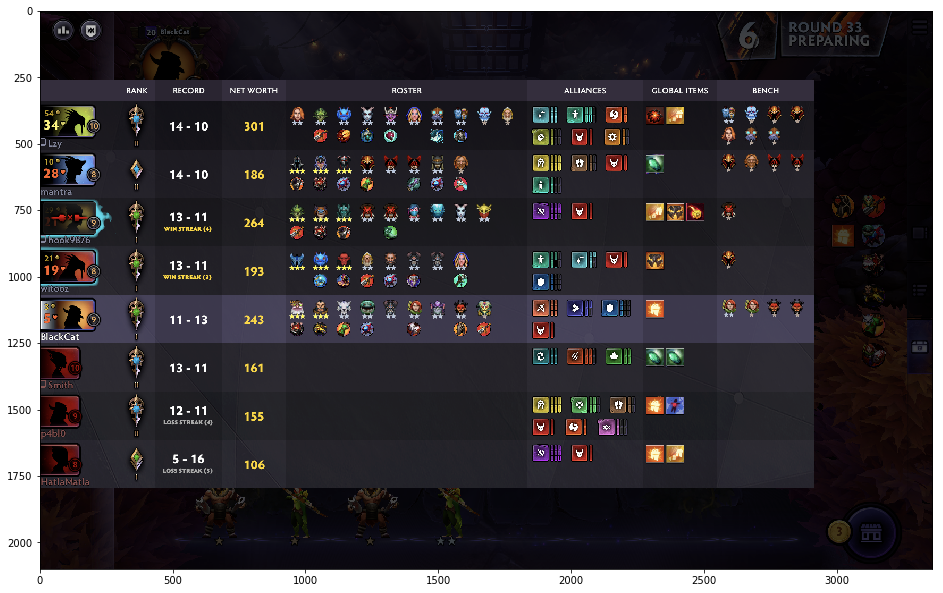

In [396]:
plt.figure(figsize=(16,16))
plt.imshow(image)

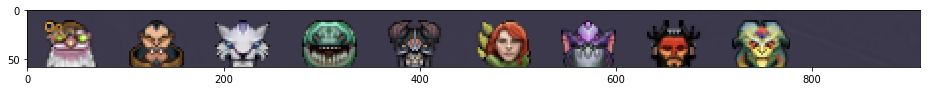

In [401]:
plt.figure(figsize=(16,16))
plt.imshow(small_image[:, :])

In [400]:
small_image = image[y_top[4]:y_bot[4], x_arr[2]:x_arr[3]]

In [39]:
px_prev.shape

(58, 3)

In [110]:
69-18

51

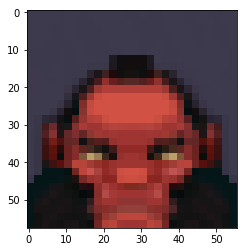

In [294]:
plt.imshow(small_image[:, 368:424])

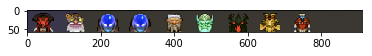

In [363]:
plt.imshow(small_image)

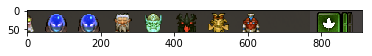

In [350]:
small_image[:,:,2] = [[max(pixel - 25, 0) if pixel < 190 else min(pixel + 25, 255) for pixel in row] for row in small_image[:,:,2]]
plt.imshow(small_image)

In [354]:
small_image.shape

(58, 910, 3)

In [383]:
def get_x_cootdinates_boom(small_image):
    px_prev = small_image[:, 0:1]
    px_prev = np.array(px_prev, dtype='int')
    x_start = []
    x_finish = []
    number_start = 0
    number_finish = 0
    is_hero = False
    treshold = 200
    for number in range(small_image.shape[1]):
        px = small_image[:, number:number+1]
        px = np.array(px, dtype='int')
        diff = abs(np.linalg.norm(px-px_prev))
        if diff>=treshold and is_hero==False:
            number_start = number
            x_start.append(number)
            is_hero = True
            print(f'{number}: {diff}')
        elif diff<treshold and is_hero==True:
            number_finish = number
            is_hero=False
            print(f'{number}: {diff}')    
            x_finish.append(number_finish)
            plt.figure()
            plt.imshow(small_image[:, number_start:number_finish])
            plt.show()
    return x_start, x_finish

18: 400.8391198473522
70: 84.22588675698226


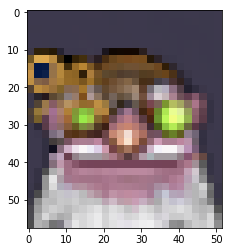

104: 329.8969536082442
160: 11.135528725660043


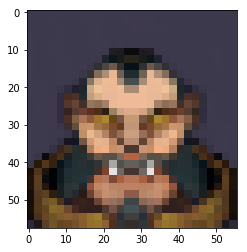

194: 496.1290154788369
246: 187.75515971605148


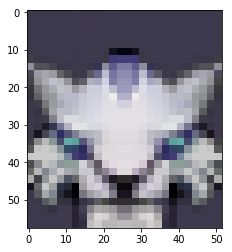

280: 336.5352878971238
336: 12.24744871391589


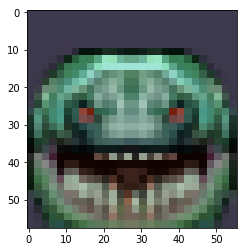

370: 253.76761022636438
420: 175.64168070250295


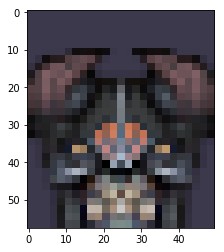

460: 438.4312945034832
514: 9.16515138991168


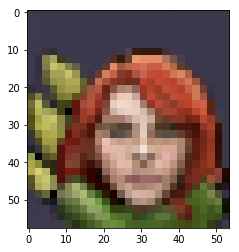

544: 237.2298463515921
600: 13.114877048604


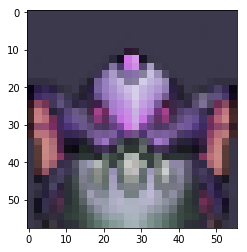

632: 229.98260803808623
686: 21.817424229271428


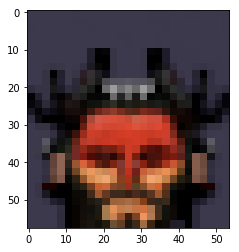

718: 298.8511335096456
778: 20.29778313018444


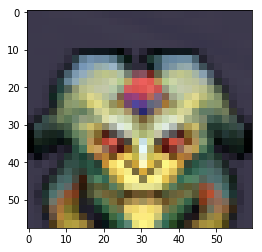

In [402]:
x, y = get_x_cootdinates_boom(small_image)

In [302]:
def get_x_cootdinates(small_image):
    px_prev = small_image[:, 0:1]
    x_start = []
    x_finish = []
    number_start = 0
    number_finish = 0
    is_hero = False
    treshold = 15
    for number in range(small_image.shape[1]):
        px = small_image[:, number:number+1]
        diff = abs(np.linalg.norm(px)-np.linalg.norm(px_prev))
        if diff>=treshold and is_hero==False:
            number_start = number
            x_start.append(number)
            is_hero = True
            print(f'{number}: {diff}')
        elif diff<treshold-7.5 and is_hero==True:
            number_finish = number
            is_hero=False
            print(f'{number}: {diff}')    
            x_finish.append(number_finish)
            plt.figure()
            plt.imshow(small_image[:, number_start:number_finish])
            plt.show()
    return x_start, x_finish

18: 200.03153270775124
19: 0.0


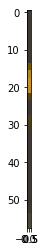

20: 147.09666634240125
21: 0.0


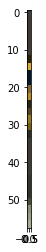

22: 284.04724809431605
23: 0.0


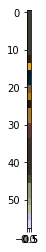

24: 343.38325278936713
25: 0.0


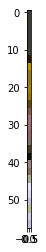

28: 134.5513529445475
29: 0.0


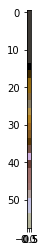

30: 126.22204409095275
31: 0.0


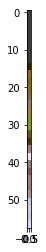

34: 34.798295634119086
35: 0.0


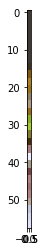

36: 107.6336421655335
37: 0.0


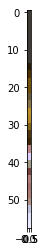

38: 178.36164861246107
39: 0.0


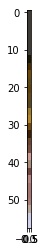

40: 69.29822422603957
41: 0.0


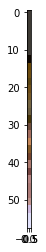

42: 32.48312906324304
43: 0.0


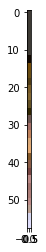

44: 111.359237777717
45: 0.0


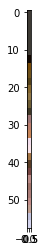

46: 111.27492564989461
47: 0.0


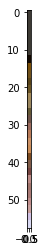

48: 78.52107892082086
49: 0.0


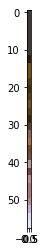

50: 38.99564032140188
51: 0.0


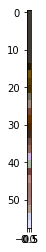

52: 169.70004173970733
53: 0.0


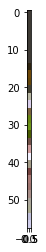

54: 148.8347493211943
55: 0.0


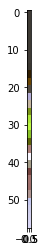

56: 21.996940436288014
57: 0.0


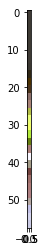

58: 72.12742738017573
59: 0.0


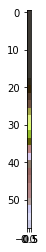

60: 106.90746583530859
61: 0.0


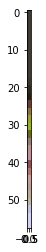

62: 60.87301718765798
63: 0.0


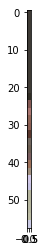

64: 263.903671902568
65: 0.0


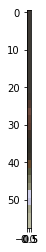

66: 247.73594062813368
67: 0.0


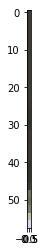

68: 270.6507439178165
69: 0.0


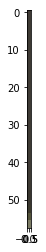

70: 48.442097949095796
71: 0.0


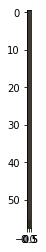

108: 214.11906674600732
109: 0.0


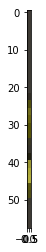

110: 281.68008526703954
111: 0.0


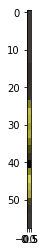

112: 78.44851527018864
113: 0.0


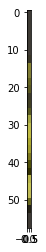

114: 31.543832461117518
115: 0.0


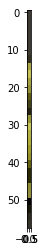

116: 210.7967739813023
117: 0.0


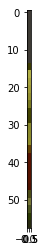

118: 30.165917260831975
119: 0.0


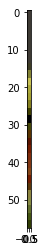

122: 79.5606779805737
123: 0.0


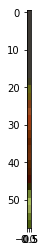

124: 21.547594027661944
125: 0.0


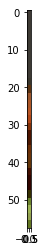

126: 89.62503759025049
127: 0.0


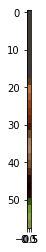

128: 199.42121291125864
129: 0.0


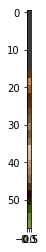

130: 215.34194207985456
131: 0.0


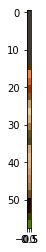

132: 114.48522031446964
133: 0.0


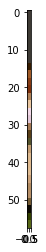

134: 58.1243960548577
135: 0.0


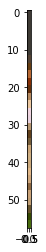

138: 58.75333297053521
139: 0.0


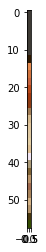

140: 226.7313841868454
141: 0.0


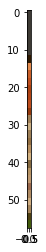

142: 68.6660726938976
143: 0.0


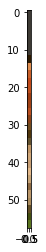

144: 41.1762367664528
145: 0.0


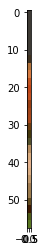

146: 108.47221188656385
147: 0.0


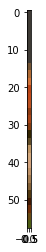

148: 169.1245370370948
149: 0.0


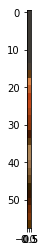

150: 149.84753172546948
151: 0.0


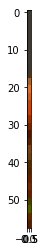

152: 16.46367610899165
153: 0.0


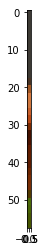

154: 17.41393315026812
155: 0.0


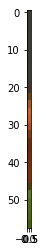

156: 52.96181237195958
157: 0.0


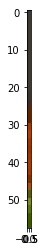

158: 213.9851404049615
159: 0.0


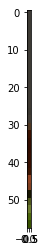

160: 86.45622057534456
161: 0.0


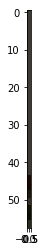

162: 77.876181867431
163: 0.0


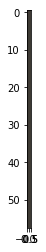

192: 73.03801904717545
193: 0.0


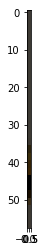

194: 145.87621994045708
195: 0.0


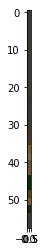

196: 34.66667868630941
197: 0.0


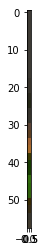

198: 61.66834250309046
199: 0.0


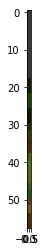

200: 278.24090901162504
201: 0.0


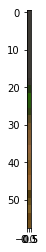

202: 149.29921661857077
203: 0.0


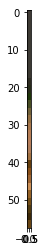

204: 49.379098654866766
205: 0.0


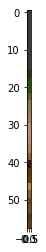

206: 130.6188665037282
207: 0.0


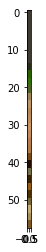

210: 47.93504856840855
211: 0.0


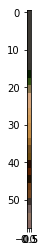

212: 203.82242036637604
213: 0.0


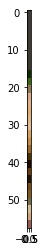

216: 128.02290181961007
217: 0.0


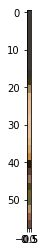

218: 70.17799217173638
219: 0.0


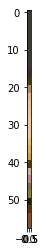

220: 110.3599355007384
221: 0.0


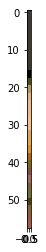

224: 141.04653505177612
225: 0.0


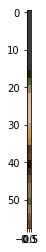

226: 67.62326132985027
227: 0.0


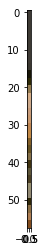

228: 20.861438972426868
229: 0.0


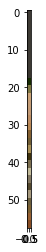

230: 61.78482114244571
231: 0.0


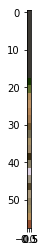

232: 150.42476137279846
233: 0.0


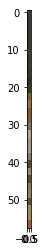

236: 76.2255197070806
237: 0.0


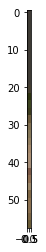

238: 265.21747659754726
239: 0.0


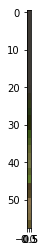

240: 219.0031175320919
241: 0.0


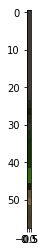

242: 81.43181935503219
243: 0.0


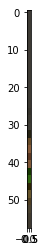

244: 113.9362157926513
245: 0.0


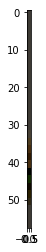

246: 54.716982420236945
247: 0.0


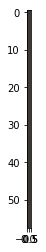

280: 44.139384516693895
281: 0.0


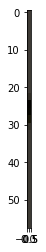

284: 19.998665017398935
285: 0.0


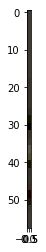

286: 65.24917513462947
287: 0.0


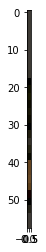

288: 84.48707257257718
289: 0.0


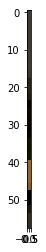

290: 176.31904117952
291: 0.0


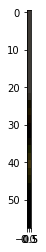

292: 129.2325832619282
293: 0.0


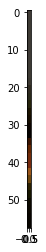

294: 213.79102509345466
295: 0.0


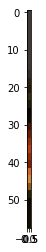

296: 124.01252793711728
297: 0.0


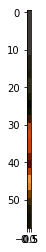

298: 51.47524936340983
299: 0.0


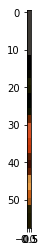

300: 108.26470130919529
301: 0.0


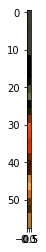

302: 113.4561331244388
303: 0.0


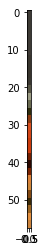

304: 159.47511354898802
305: 0.0


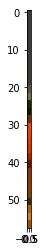

306: 114.92137231780248
307: 0.0


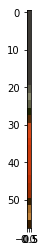

308: 122.78797063223396
309: 0.0


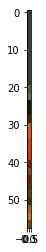

310: 137.02459030885598
311: 0.0


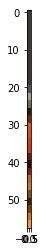

312: 103.17643922560273
313: 0.0


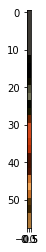

314: 87.22436524152317
315: 0.0


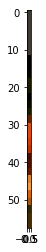

316: 73.61633315978156
317: 0.0


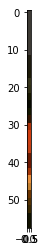

318: 162.17683832550756
319: 0.0


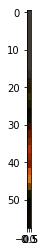

320: 199.92165115601802
321: 0.0


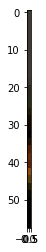

322: 106.68739613705856
323: 0.0


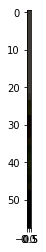

324: 169.1597362462407
325: 0.0


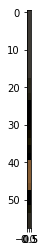

326: 36.908981742889864
327: 0.0


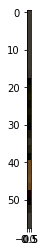

328: 35.32056617565502
329: 0.0


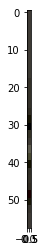

330: 27.054914356363042
331: 0.0


KeyboardInterrupt: 

In [301]:
x, y = get_x_cootdinates(small_image)

In [297]:
len(x), len(y)

(9, 8)

In [399]:
# %%timeit
px_prev = image[265, 0:][0]
x_arr = []
for i, px in enumerate(image[265, 0:]):
    if np.linalg.norm(px-px_prev) == 0:
        continue
    px_prev = px
    x_arr.append(i)
x_arr=x_arr[:7]
# x_arr


In [387]:
x_arr[2]

924

In [227]:
xx = range(arr[2]+15, arr[3]-15, 88)

In [228]:
xx

range(939, 1819, 88)

In [232]:
arr[3] - arr[2]

910

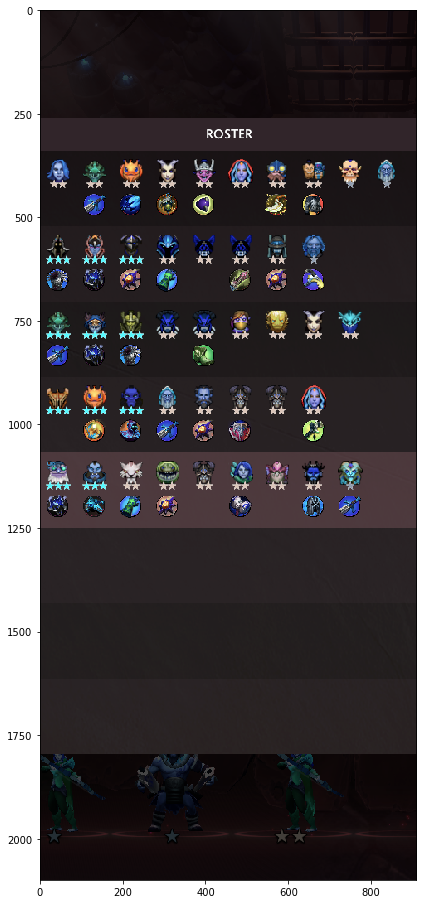

In [236]:
plt.figure(figsize=(16,16))
plt.imshow(image[:, arr[2]:arr[3]-1])

In [203]:
x_start = arr[2]
x_end = arr[3]

In [224]:
y_top

[350, 531, 716, 896, 1078, 1260, 1440, 1620]

In [225]:
y_bot

[438, 619, 804, 984, 1166, 1348, 1528, 1708]

In [75]:
y_top = [int(data.loc[number, 'Unnamed: 1']) for number in range(0, 15) if number%2==0]
y_bot = [int(data.loc[number, 'Unnamed: 1']) for number in range(0, 16) if number%2==1]

In [94]:
y_bot = [int(data.loc[number, 'Unnamed: 1']) for number in range(0, 16) if number%2==1]

In [51]:
x_left, step, x_rigth = 924, 88, 1804

In [99]:
x = range(x_left, x_rigth, step)

In [139]:
def save_all_icons_from_image(img, y_top, y_bot, x, number_img):
    for number_user in range(len(y_top)):
        for number_pic in range(len(x)):
            crop_img = img[y_top[number_user]:y_bot[number_user], x[number_pic]:x[number_pic]+88]
            cv2.imwrite(f'../dota/crop_image/img{number_img}_{number_user}_{number_pic}.png',crop_img)

In [144]:
def get_all_icons_from_image(img, y_top, y_bot, x):
    all_image = []
    for number_user in range(len(y_top)):
        for number_pic in range(len(x)):
            crop_img = img[y_top[number_user]:y_bot[number_user], x[number_pic]:x[number_pic]+88]
            all_image.append(crop_img)
    return all_image

In [229]:
all_image = get_all_icons_from_image(image, y_top, y_bot, xx)

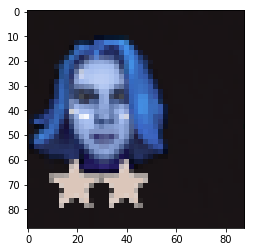

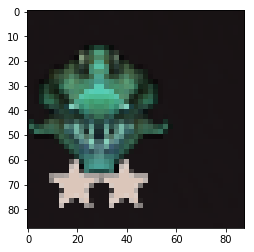

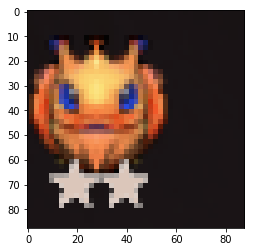

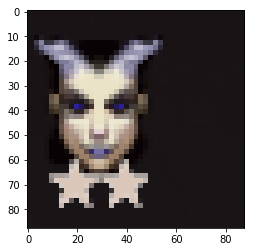

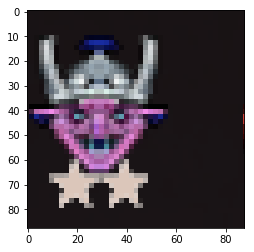

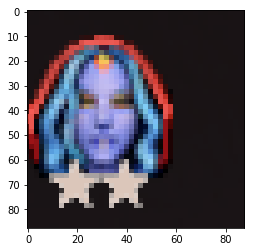

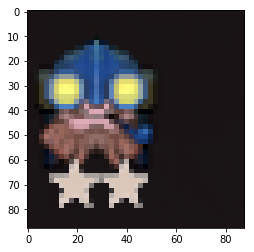

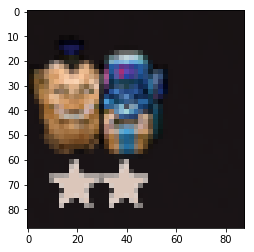

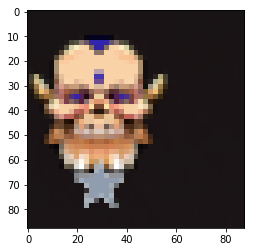

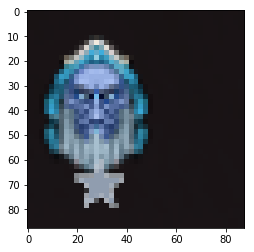

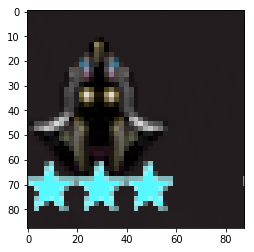

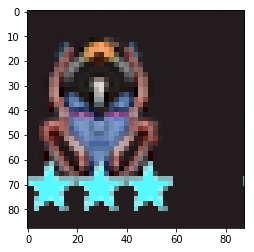

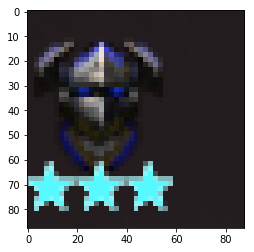

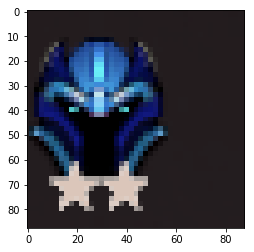

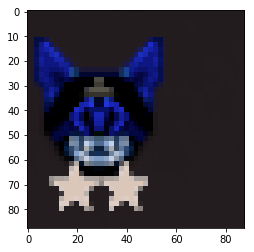

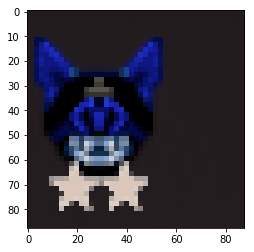

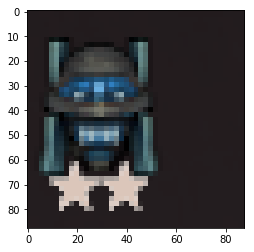

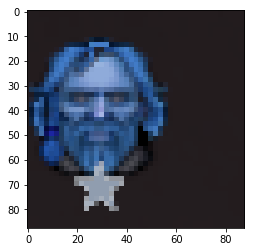

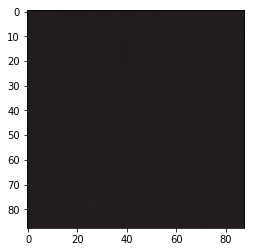

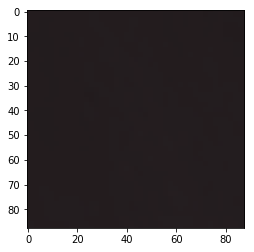

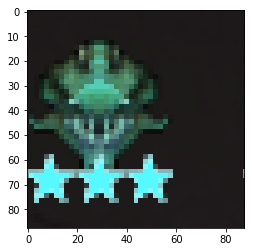

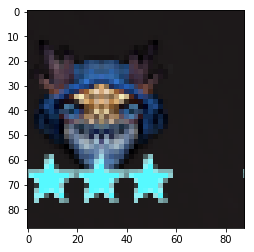

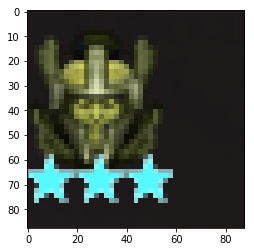

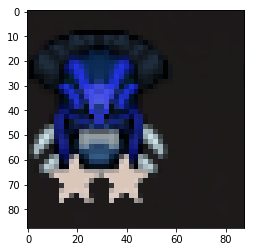

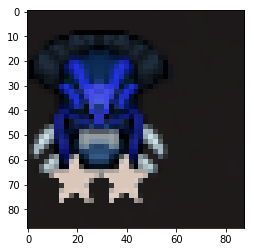

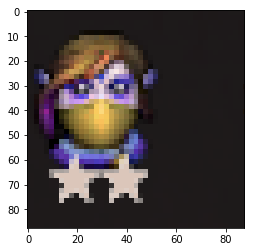

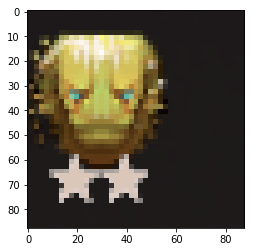

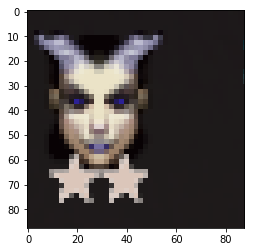

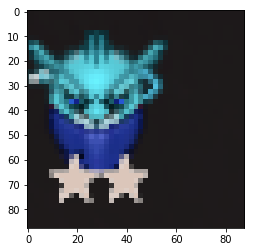

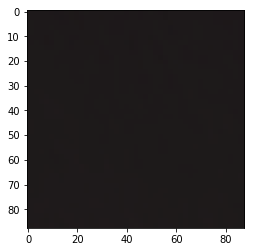

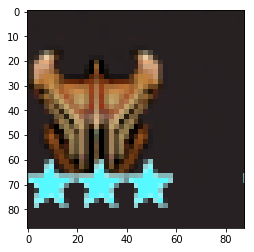

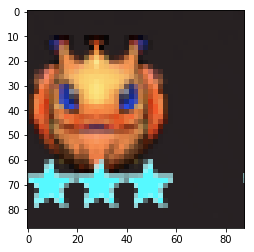

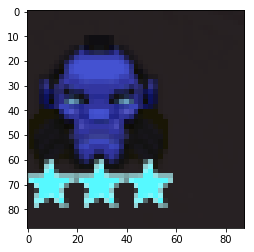

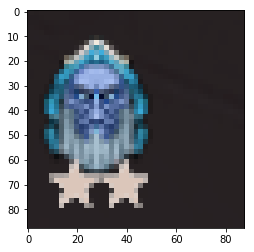

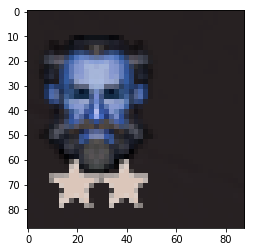

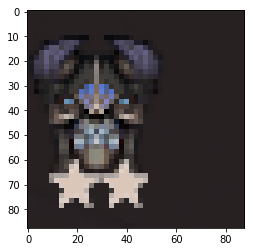

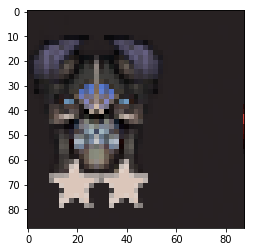

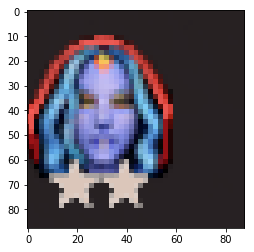

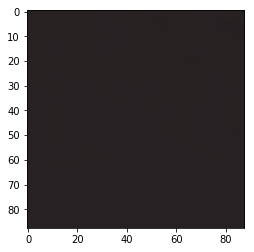

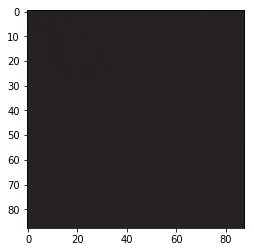

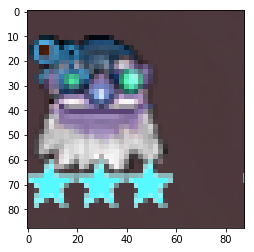

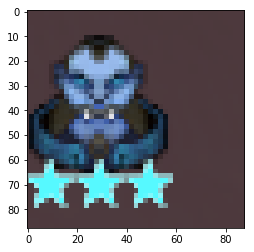

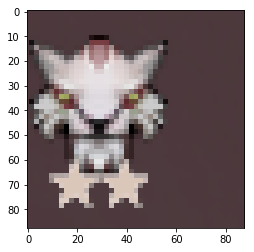

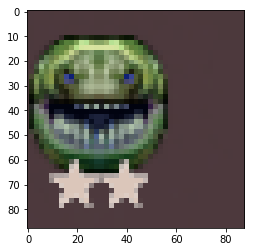

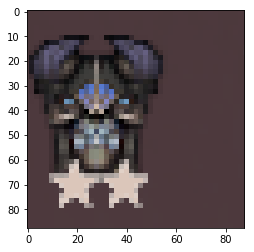

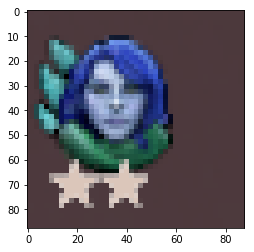

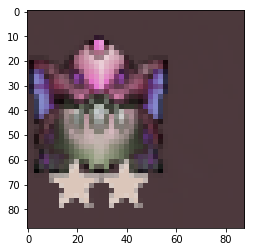

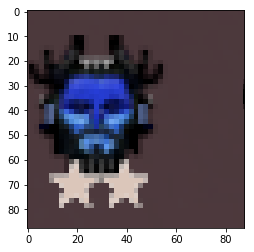

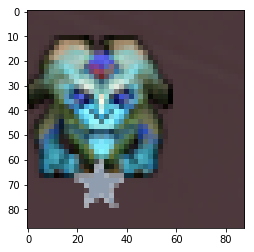

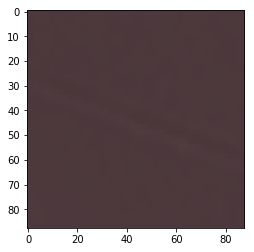

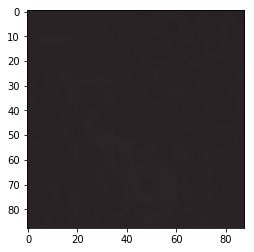

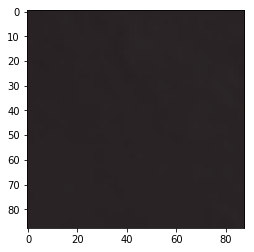

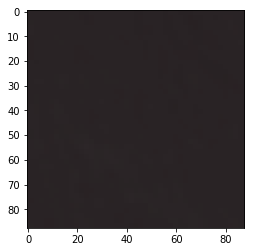

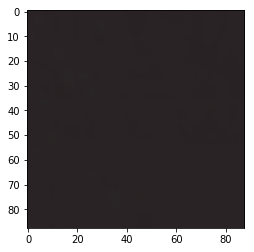

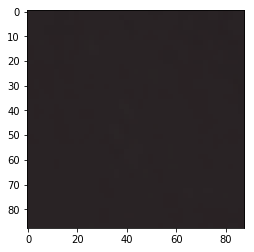

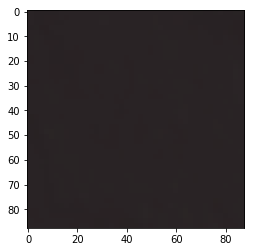

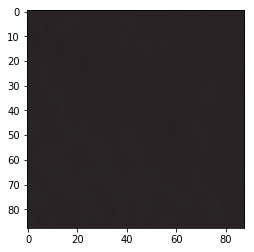

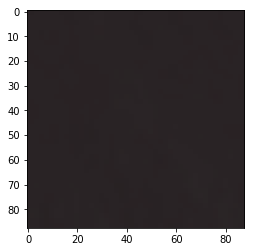

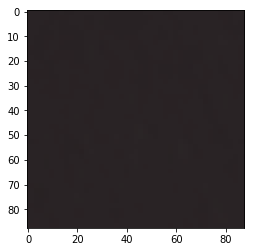

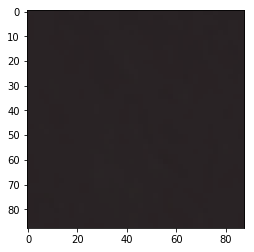

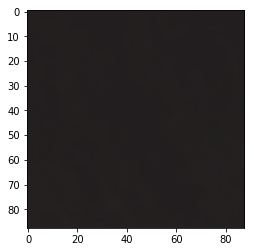

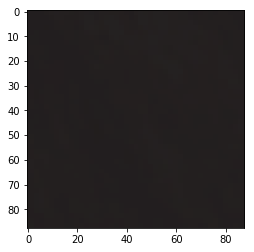

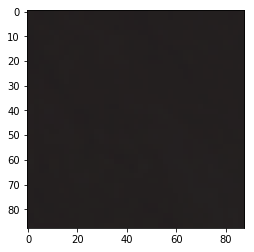

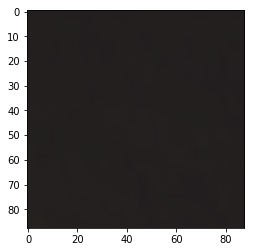

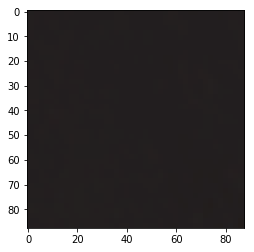

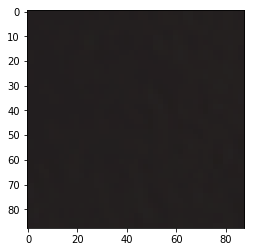

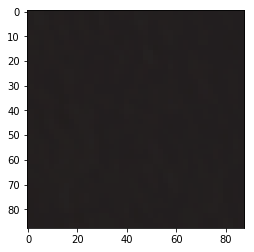

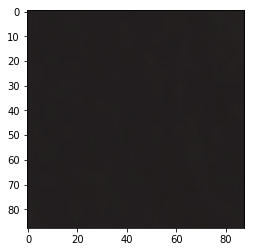

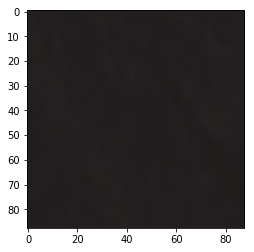

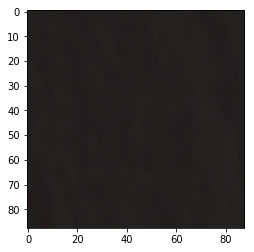

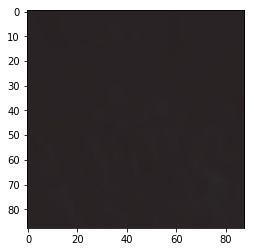

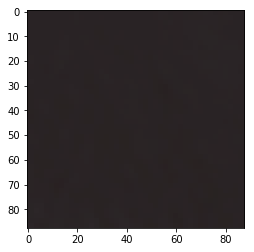

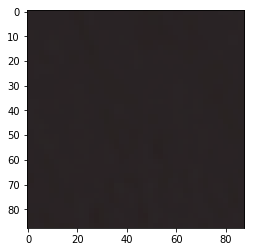

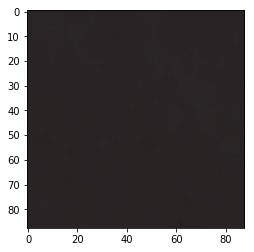

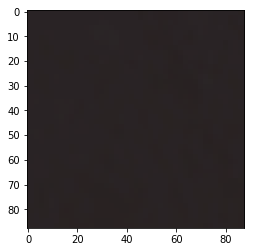

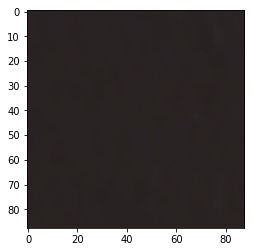

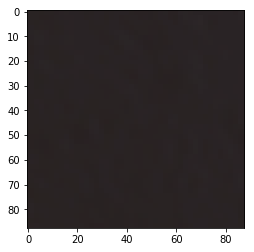

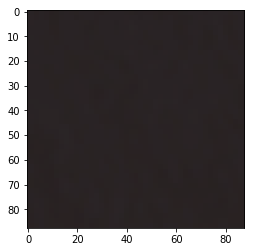

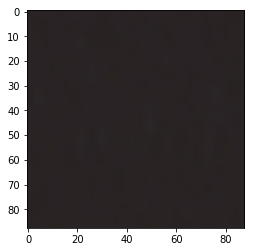

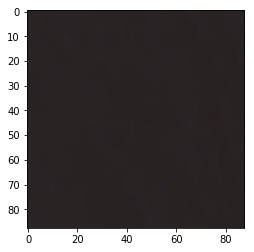

In [230]:
for image in all_image:
    plt.figure()
    plt.imshow(image)
    plt.show()

In [116]:
for number, path in enumerate(path_to_files):
    image = cv2.imread(path)
    save_all_icons_from_image(image, y_top, y_bot, x, number)
    print(f'Image {number} done!')

Image 0 done!
Image 1 done!
Image 2 done!
Image 3 done!
Image 4 done!
Image 5 done!
Image 6 done!
Image 7 done!
Image 8 done!
Image 9 done!
Image 10 done!
Image 11 done!
Image 12 done!


In [122]:
im1 = cv2.imread('/home/redreckless/Рабочий стол/dota/crop_image/img2_6_3.png')
im2 = cv2.imread('/home/redreckless/Рабочий стол/dota/crop_image/img2_7_5.png')

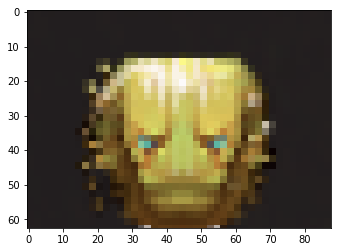

In [134]:
plt.imshow(im1[0:63, 0:88])

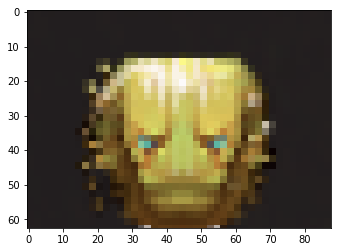

In [135]:
plt.imshow(im1[0:63, 0:88])

In [137]:
(np.linalg.norm(im1[0:63, 0:88]) - np.linalg.norm(im2[0:63, 0:88]))/np.linalg.norm(im2[0:63, 0:88])

-0.010400722037482211

In [138]:
(np.linalg.norm(im1) - np.linalg.norm(im2))/np.linalg.norm(im2)

0.0652810138966795

In [174]:
np.linalg.norm(px-px_prev)

0.0

In [175]:
px

array([61, 46, 52], dtype=uint8)

In [176]:
px_prev

array([61, 46, 52], dtype=uint8)